<a href="https://colab.research.google.com/github/NavyaPadamuttam/Loan/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [5]:
df = pd.read_csv('/content/fake_job_postings.csv',encoding='ISO-8859-1', sep=',', on_bad_lines='skip')
# Try 'latin-1' encoding, you might need to experiment with other encodings like 'cp1252', 'iso-8859-1' etc. if this doesn't work.
df.head() # Call head() method on the DataFrame object


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI  Environmental Systems Rese...,"EDUCATION: Bachelors or Masters in GIS, busi...",Our culture is anything but corporatewe have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17879 non-null  int64 
 1   title                17879 non-null  object
 2   location             17533 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14571 non-null  object
 6   description          17878 non-null  object
 7   requirements         15183 non-null  object
 8   benefits             10667 non-null  object
 9   telecommuting        17879 non-null  int64 
 10  has_company_logo     17879 non-null  int64 
 11  has_questions        17879 non-null  int64 
 12  employment_type      14408 non-null  object
 13  required_experience  10829 non-null  object
 14  required_education   9774 non-null   object
 15  industry             12976 non-null  object
 16  func

In [8]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI  Environmental Systems Rese...,"EDUCATION: Bachelors or Masters in GIS, busi...",Our culture is anything but corporatewe have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17874,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time youve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17875,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17876,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17877,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [9]:
df.isnull().any()

,0
job_id,False
title,False
location,True
department,True
salary_range,True
company_profile,True
description,True
requirements,True
benefits,True
telecommuting,False


In [10]:
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,11546
salary_range,15011
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [11]:
df['salary_range'].unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '09-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '130

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17879 non-null  int64 
 1   title                17879 non-null  object
 2   location             17533 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14571 non-null  object
 6   description          17878 non-null  object
 7   requirements         15183 non-null  object
 8   benefits             10667 non-null  object
 9   telecommuting        17879 non-null  int64 
 10  has_company_logo     17879 non-null  int64 
 11  has_questions        17879 non-null  int64 
 12  employment_type      14408 non-null  object
 13  required_experience  10829 non-null  object
 14  required_education   9774 non-null   object
 15  industry             12976 non-null  object
 16  func

In [13]:
df.drop(['job_id','salary_range','telecommuting','has_company_logo','has_questions'],axis=1,inplace=True)

In [14]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI  Environmental Systems Rese...,"EDUCATION: Bachelors or Masters in GIS, busi...",Our culture is anything but corporatewe have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [15]:
df.shape

(17879, 13)

In [16]:
df.fillna('',inplace=True)

In [17]:
df.isnull().sum()

,0
title,0
location,0
department,0
company_profile,0
description,0
requirements,0
benefits,0
employment_type,0
required_experience,0
required_education,0


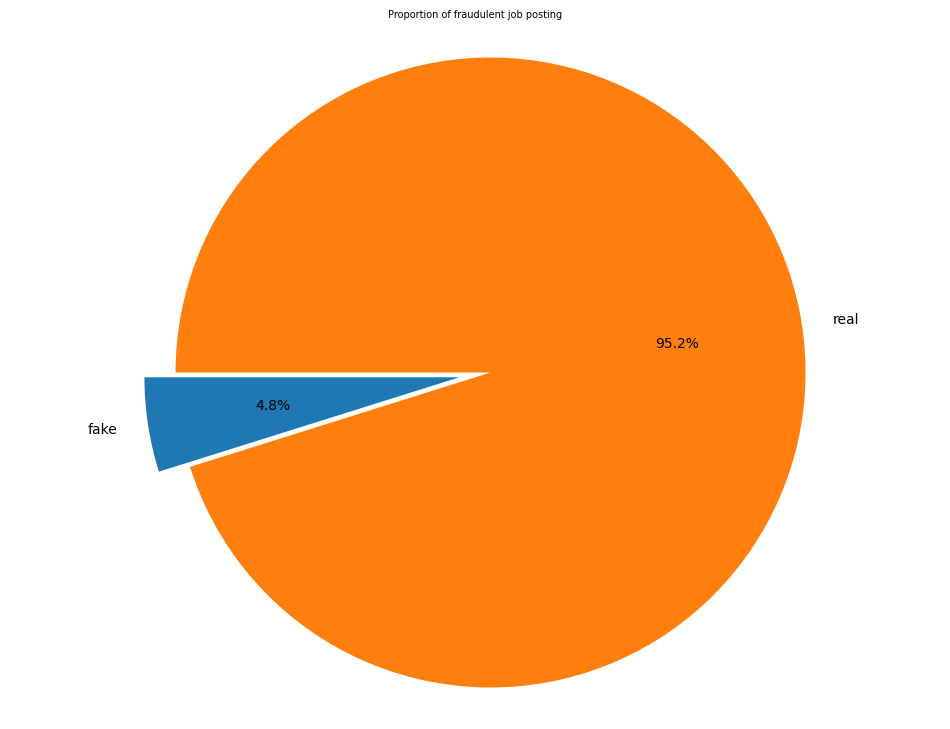

In [18]:
labels=['fake','real']
sizes=[df['fraudulent'][df['fraudulent'] ==1].count(),df['fraudulent'][df['fraudulent']==0].count()]
explode = (0,0.1)

fig1 ,ax1 =plt.subplots(figsize=(12,9))
ax1.pie(sizes, explode =explode, labels=labels,autopct ='%1.1f%%', startangle=180)

ax1.axis('equal')
plt.title("Proportion of fraudulent job posting", size=7)
plt.show()

In [19]:
#visualize job posting by countries

def split(location):
    if pd.isna(location):
        return "unknown"
    l= location.split(',')
    return l[0]

df['country']=df['location'].apply(split)


In [20]:
df['country'].nunique()

91

In [21]:
df['country'].value_counts()[:11]

,count
country,
US,10656
GB,2384
GR,940
CA,457
DE,383
,346
NZ,333
IN,276
AU,213


Text(0, 0.5, 'Number of jobs')

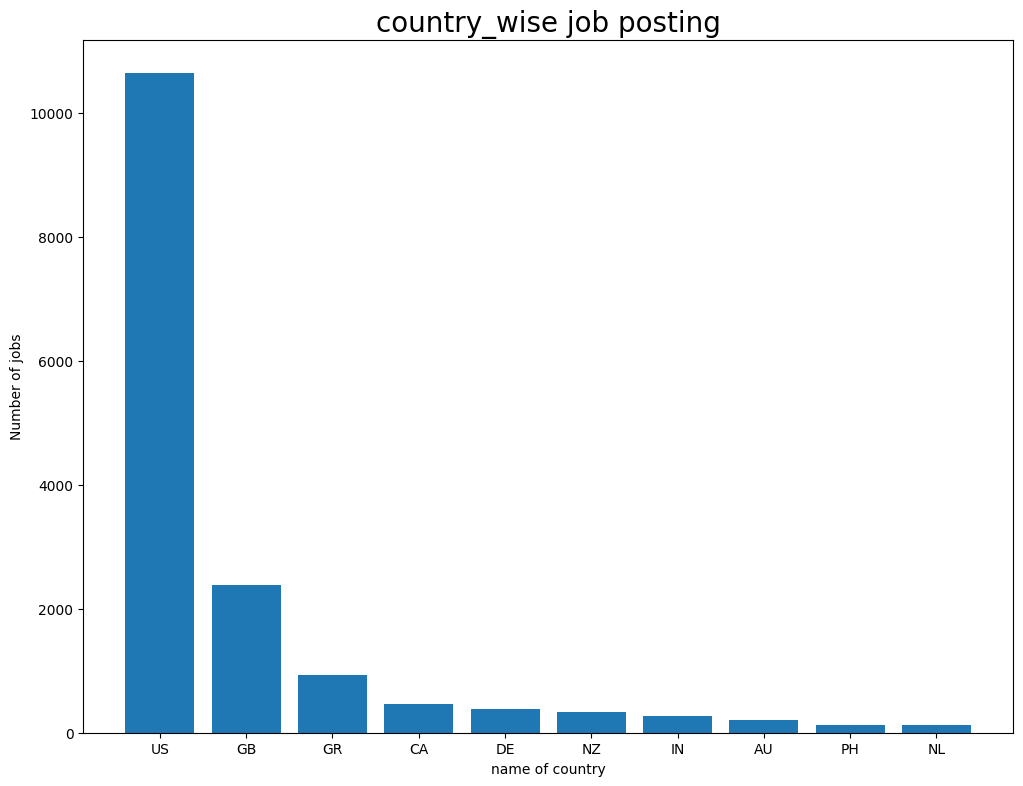

In [22]:
country =dict(df.country.value_counts()[:11])
del country['']
plt.figure(figsize=(12,9))
plt.title('country_wise job posting',size =20)
plt.bar(country.keys(),country.values())
plt.xlabel('name of country')
plt.ylabel('Number of jobs')

Text(0, 0.5, 'Number of jobs')

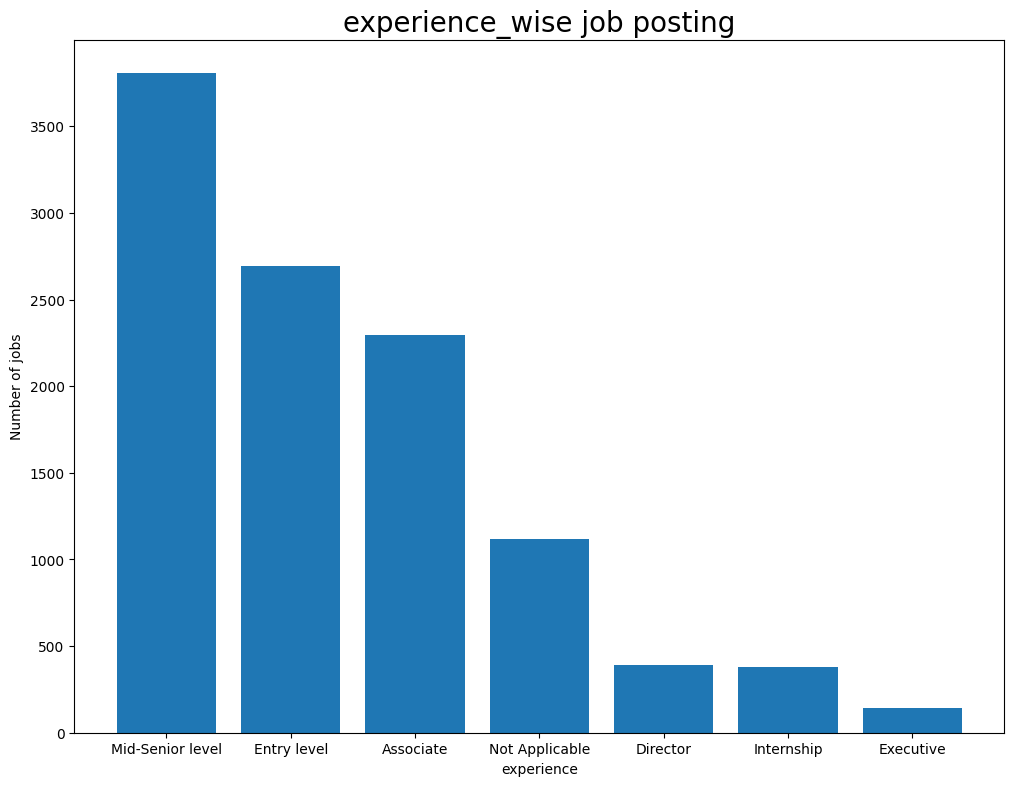

In [23]:
experience =dict(df.required_experience.value_counts()[:11])
del experience['']
plt.figure(figsize=(12,9))
plt.title('experience_wise job posting',size =20)
plt.bar(experience.keys(),experience.values())
plt.xlabel('experience')
plt.ylabel('Number of jobs')

Text(0, 0.5, 'Number of jobs')

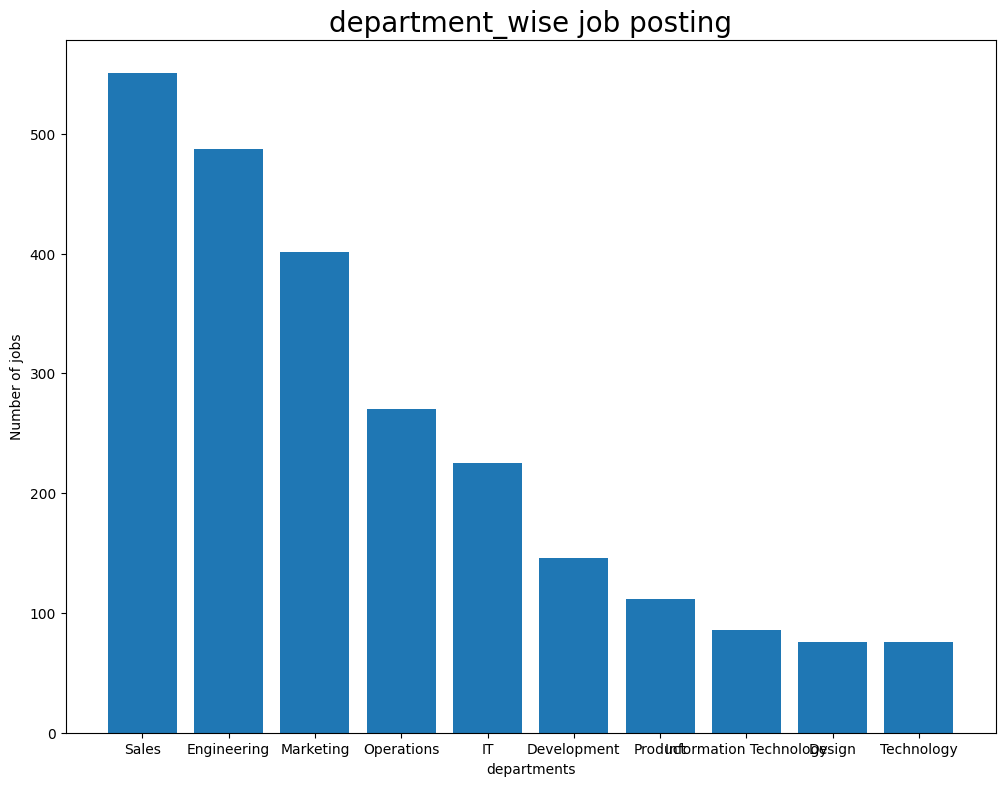

In [24]:
department =dict(df.department.value_counts()[:11])
del department['']
plt.figure(figsize=(12,9))
plt.title('department_wise job posting',size =20)
plt.bar(department.keys(),department.values())
plt.xlabel('departments')
plt.ylabel('Number of jobs')

In [25]:
df.title.value_counts()[:11]

,count
title,
English Teacher Abroad,311
Customer Service Associate,146
Graduates: English Teacher Abroad (Conversational),144
English Teacher Abroad,95
Software Engineer,86
English Teacher Abroad (Conversational),83
Customer Service Associate - Part Time,76
Account Manager,75
Web Developer,66


In [26]:
df[df.fraudulent ==1].title.value_counts()[:11]

,count
title,
Data Entry Admin/Clerical Positions - Work From Home,21
Home Based Payroll Typist/Data Entry Clerks Positions Available,21
Cruise Staff Wanted *URGENT*,21
Customer Service Representative,17
Administrative Assistant,16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily,12
"Account Sales Managers $80-$130,000/yr",10
Network Marketing,10
Payroll Clerk,10


In [27]:
df[df.fraudulent ==0].title.value_counts()[:11]

,count
title,
English Teacher Abroad,311
Customer Service Associate,146
Graduates: English Teacher Abroad (Conversational),144
English Teacher Abroad,95
Software Engineer,86
English Teacher Abroad (Conversational),83
Customer Service Associate - Part Time,76
Account Manager,73
Web Developer,66


In [28]:
df.columns


Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [32]:
# Combine text columns safely
df['text'] = df['title'] + ' ' + df['department'] + ' ' + df['country'] + ' ' + df['company_profile'] + ' ' + df['description']

# Delete columns after creating the 'text' column
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_education']
del df['industry']
del df['function']
del df['country']

KeyError: 'title'

In [35]:
# Combine text columns safely
df['text'] = df['required_experience'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] # Creating 'text' column from existing columns
# Delete columns after creating the 'text' column
del df['required_experience']
del df['employment_type']
del df['required_education']
del df['industry']
del df['function']

In [36]:
df.head()

,fraudulent,country,text
0,0,US,Internship Other Marketing
1,0,NZ,Not Applicable Full-time Marketing and Advert...
2,0,US,
3,0,US,Mid-Senior level Full-time Bachelor's Degree C...
4,0,US,Mid-Senior level Full-time Bachelor's Degree H...


In [38]:
!pip install WordCloud

In [39]:
#check the frequency of word in dataset
from wordcloud import WordCloud
all_words= ' '.join([text for text in df['text']])

In [42]:
wordcloud = WordCloud(width=600, height=300, max_font_size=120,).generate(all_words)

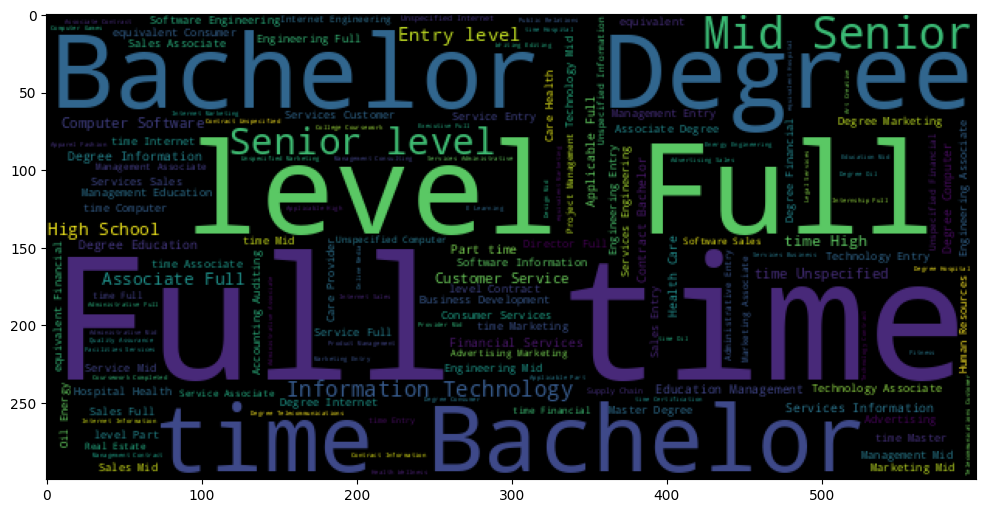

In [44]:
plt.figure(figsize = (12,9))

plt.imshow(wordcloud)
plt.show()

In [45]:
#frequency of word in real posting of jobs
real_post = ' '.join([text for text in df['text'][df['fraudulent']==0]])


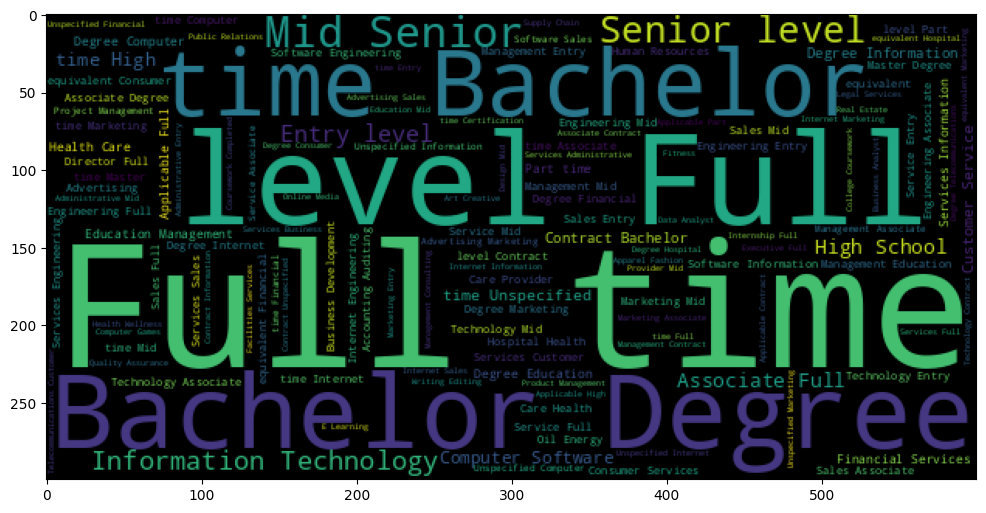

In [49]:
wordcloud = WordCloud(width=600, height=300, max_font_size =120).generate(real_post)
plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.show()

In [50]:
#frequency of word in real posting of jobs
fake_post = ' '.join([text for text in df['text'][df['fraudulent']==1]])


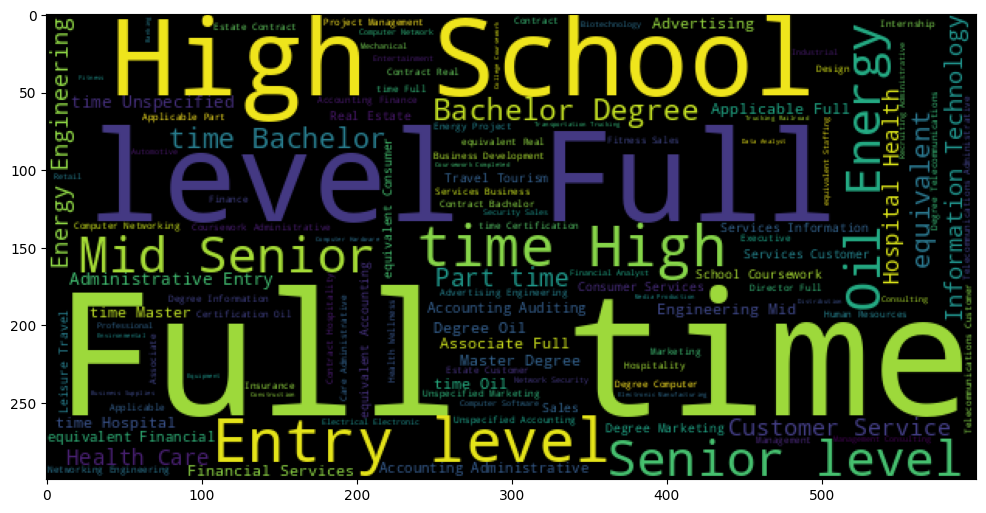

In [51]:
wordcloud = WordCloud(width=600, height=300, max_font_size =120).generate(fake_post)
plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.show()

In [52]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [54]:
stop_words = set(stopwords.words("english"))

In [56]:
df['text'] = df['text'].apply(lambda x:x.lower())

In [57]:
df['text'] = df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in(stop_words)]))

In [58]:
df['text'][0]

'internship marketing'

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text, df.fraudulent, test_size=0.3,)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [64]:
#Convert the text data into vector format
X_train_dtm = vect.transform(X_train)

In [65]:
X_train_dtm

<12515x240 sparse matrix of type '<class 'numpy.int64'>'
	with 74805 stored elements in Compressed Sparse Row format>

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5364x240 sparse matrix of type '<class 'numpy.int64'>'
	with 32231 stored elements in Compressed Sparse Row format>

In [69]:
#Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_dtm,y_train)

MultinomialNB()

In [70]:
y_pred_nb = nb.predict(X_test_dtm)

In [71]:
accuracy_score(y_test,y_pred_nb)

0.9207680835197614

In [73]:
#Decision Tree Classifier
dt =DecisionTreeClassifier()
dt.fit(X_train_dtm,y_train)

DecisionTreeClassifier()

In [74]:
y_pred_dt = dt.predict(X_test_dtm)

In [75]:
accuracy_score(y_test,y_pred_dt)

0.9604772557792692

In [78]:
X_test[159]

''

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

In [82]:
y = df.fraudulent
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64


In [86]:

X = df.drop('fraudulent', axis=1) # Change the second argument to axis=1
print(X.head())

  country                                               text
0      US                               internship marketing
1      NZ  applicable full-time marketing advertising cus...
2      US                                                   
3      US  mid-senior level full-time bachelor's degree c...
4      US  mid-senior level full-time bachelor's degree h...


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape, y_train.shape) # Changed y-train.shape to y_train.shape
print ('Test set:', X_test.shape, y_test.shape)

Train set: (12515, 2) (12515,)
Test set: (5364, 2) (5364,)
